<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/06_TensorFlow_Keras/01_pierwsza_sie%C4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Keras to wysokopoziomowa bublioteka zbudowana na TensorFlow (moze tez dzlalac na innych)
# TensorFlow ma wbudowane Keras w sobie

# regresja logistyczna jest przykladem najprostszej sieci neuronowej z jednym neuronem

### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).



In [ ]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout # kontrojuje overfitting

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.12.0


# Załadownaie danych

In [ ]:
# ładuujemy przykladowe dane rozpoznawanie cyfr
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
# do sieci neuronowych wrzucamy zazwyczaj dane wystandandaryzowane
# dziliny przez max wartosc piksela, wiec dostajemy dane w przedziale 0-1
X_train = X_train / 255.
X_test = X_test / 255.

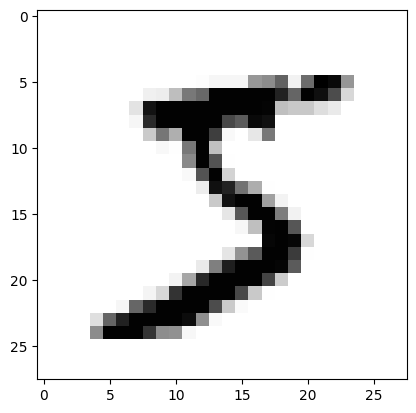

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

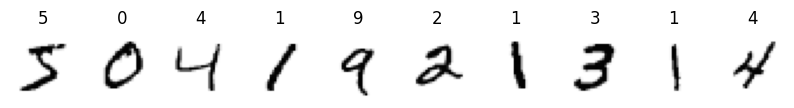

In [ ]:
plt.figure(figsize=(10,40))
for i in range(0, 10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='Greys')

# Budowa sieci neuronowej

In [ ]:
model = Sequential() # instancja klasy Sequential
model.add(Flatten(input_shape=(28, 28))) # wyplaszczanie danych z parametrem gdzie podajemy ksztalt tablicy danych wejsciowych
model.add(Dense(units=128, activation='relu')) #128 neuronow, funkcja aktywacji relu zerujaca wartosci ujemne
model.add(Dropout(0.2)) # porzuca 20% neuronow w tej warstwie
model.add(Dense(units=10, activation='softmax')) # 10 neuronow dla kazdej klasy, softmax zwraca prawdopodobienstwo dla danej klasy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trenowanie modelu

In [ ]:
history = model.fit(X_train, y_train, epochs=5)
#epochs oznacza ile razy zbior ma przejsc przez siec podczas optymalizacji
# przypisujemy do zmiennej zeby zobaczyc metryki podczas kolejnych przejsc

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2953 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1418 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9767


In [ ]:
model.evaluate(X_test, y_test, verbose=2) #ocena skutecznosci modelu na zbiorze testowym

313/313 - 0s - loss: 0.0721 - accuracy: 0.9774 - 444ms/epoch - 1ms/step


[0.07205436378717422, 0.977400004863739]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.295275,0.914300
1,0.141825,0.957417
2,0.105883,0.967650
3,0.087272,0.972817
4,0.073342,0.976733


In [ ]:
fig = make_subplots(rows=2, cols=1) # biblioteka plotly
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

# Predykcja na podstawie modelu

In [ ]:
y_pred = model.predict(X_test)
y_pred

# zwrocone zostala wartosc prawdopodobienstwa dla kazdej klasy
# w kazdym wierszu sa po kolei prwdpodobienstwa dla kazdej klasy

313/313 [==============================] - 0s 1ms/step


array([[0.000000010749, 0.000000000246, 0.000000695425, ..., 0.99992615    , 0.000000083151, 0.000000713657],
       [0.00000015283 , 0.00007772658 , 0.99928826    , ..., 0.000000000001, 0.000001252337, 0.000000000004],
       [0.000000980999, 0.9982227     , 0.000105597646, ..., 0.0012713012  , 0.00014259102 , 0.000001933578],
       ...,
       [0.000000000001, 0.000000000046, 0.000000000106, ..., 0.000005550315, 0.000002582404, 0.000003267486],
       [0.000000728261, 0.000000002672, 0.000000000891, ..., 0.00000002978 , 0.000040657837, 0.000000000208],
       [0.000000016121, 0.000000000003, 0.000000306145, ..., 0.000000000001, 0.000000000507, 0.000000000001]],
      dtype=float32)

In [ ]:
# find class with highest prediction
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class
# zwraca index klasy ktory w tym przypadku jest tez jej nazwa

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_pred = (pd.DataFrame({'y_test':y_test, 'y_pred':y_pred_class}))
test_pred

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [ ]:
errors = test_pred[test_pred['y_pred'] != test_pred['y_test']]
errors

,y_test,y_pred
217,6,5
247,4,2
259,6,0
321,2,7
340,5,3
...,...,...
9858,6,3
9888,6,0
9892,8,6
9893,2,3


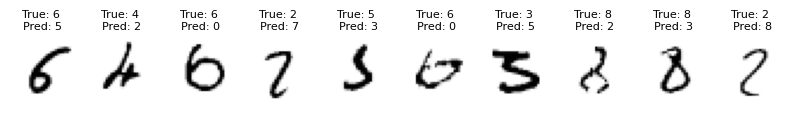

In [ ]:
plt.figure(figsize=(10, 40))
for i, idx in list(enumerate(errors.index))[:10]:
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[idx], cmap='Greys')
    plt.title(f'True: {y_test[idx]} \nPred: {y_pred_class[idx]}', fontsize=8)
    plt.axis('off')